In [2]:
import math as m
import numpy as np
from scipy.linalg import eigh
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
def S(basis) :
    N = basis.shape[0]
    Overlap_matrix = np.zeros((N,N))
    for p in range(N) :
        for q in range(p,N) :
            Overlap_matrix[p,q] = (np.pi/(basis[p] + basis[q]))**(3/2)
            Overlap_matrix[q,p] = Overlap_matrix[p,q]
    return Overlap_matrix

def T(basis) :
    N = basis.shape[0]
    Kintetic_matrix = np.zeros((N,N))
    for p in range(N) :
        for q in range(p,N) :
            Kintetic_matrix[p,q] = 3*basis[p]*basis[q]*np.pi**(3/2)/(basis[p] + basis[q])**(5/2)
            Kintetic_matrix[q,p] = Kintetic_matrix[p,q]
    return Kintetic_matrix

def A(basis) :
    N = basis.shape[0]
    Coulomb_matrix = np.zeros((N,N))
    for p in range(N) :
        for q in range(p,N) :
            Coulomb_matrix[p,q] = -2*np.pi/(basis[p] + basis[q])
            Coulomb_matrix[q,p] = Coulomb_matrix[p,q]
    return Coulomb_matrix

def Gaussian(alpha, r):
    return m.exp(-alpha*r**2)

In [4]:
def Hydrogen1(a0,print_eigenfunction) :
    basis = np.array([a0])
    S_matrix = S(basis)
    T_matrix = T(basis)
    A_matrix = A(basis)

    eigenenergy, eigenfunction = eigh((T_matrix + A_matrix), S_matrix)
    eigenenergy = np.min(eigenenergy)
    if print_eigenfunction == 1 :
        eigenfunction = eigenfunction[:,np.argmin(eigenenergy)]
        print(eigenfunction)
    return eigenenergy

def Hydrogen2(a0,a1,print_eigenfunction) : 
    basis = np.array([a0, a1])
    S_matrix = S(basis)
    T_matrix = T(basis)
    A_matrix = A(basis)

    eigenenergy, eigenfunction = eigh((T_matrix + A_matrix), S_matrix)
    eigenenergy = np.min(eigenenergy)
    if print_eigenfunction == 1 :
        eigenfunction = eigenfunction[:,np.argmin(eigenenergy)]
        print(eigenfunction)
    return eigenenergy

def Hydrogen4(a0,a1,a2,a3,print_eigenfunction) :
    basis = np.array([a0, a1, a2, a3])
    S_matrix = S(basis)
    T_matrix = T(basis)
    A_matrix = A(basis)

    eigenenergy, eigenfunction = eigh((T_matrix + A_matrix), S_matrix)
    eigenenergy = np.min(eigenenergy)
    if print_eigenfunction == 1 :
        eigenfunction = eigenfunction[:,np.argmin(eigenenergy)]
        print(eigenfunction)
    return eigenenergy

(0.2895101035042106, -0.4243566618225782)
(0.2887928613211465, -0.42436827608155797)
[0.28090359]
-0.42436542393689247


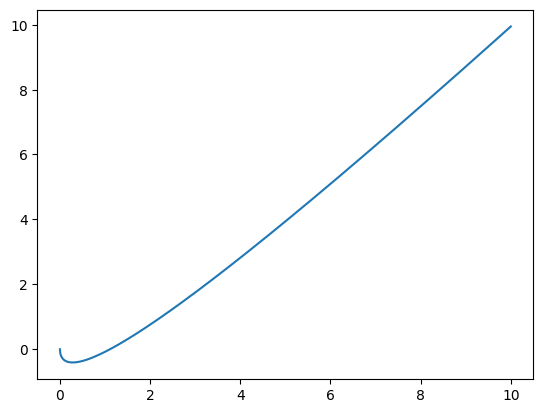

In [8]:
x = np.linspace(0.0001,10,1000)
energy = np.zeros((1,1000))
for a in range(1000) :
    energy[0,a] = Hydrogen1(x[a],0)
plt.plot(x,energy[0,:])

def gradient_descent1(a0,step_size,limit) :
    gradient = (Hydrogen1(a0+step_size,0) - Hydrogen1(a0,0))/step_size
    i = 1
    while i < limit :
        a0 = a0 + step_size*gradient if gradient <= 0 else a0 - step_size*gradient
        i += 1
    return a0,Hydrogen1(a0,0)

print(gradient_descent1(0.3,0.01,20))
print(gradient_descent1(0.2895101035042106,0.001,40))

print(Hydrogen1(0.2889767695732142,1))



In [9]:
def gradient_descent2(a0,a1,step_size,limit) :
    gradient = np.array([Hydrogen2(a0+step_size,a1,0)-Hydrogen2(a0,a1,0), Hydrogen2(a0,a1+step_size,0)-Hydrogen2(a0,a1,0)])/step_size
    i = 1
    while i < limit :
        a0 = a0 + step_size*gradient[0] if gradient[0] <= 0 else a0 - step_size*gradient[0]
        a1 = a1 + step_size*gradient[1] if gradient[1] <= 0 else a1 + step_size*gradient[1]
        i += 1
        #print(Hydrogen2(a0,a1,0))
    return a0,a1,Hydrogen2(a0,a1,0)

print(gradient_descent2(0.2,1.3,0.001,100))
print(gradient_descent2(0.19857567435131285,1.2998029023001898,0.000001,50))

print(Hydrogen2(0.19857551864329515,1.2998028798937966,1))


(0.19929141588331645, 1.2999019463704462, -0.4858015947344657)
(0.19857551864329515, 1.2998028798937966, -0.4858006427038978)
[-0.17304625 -0.24300739]
-0.4858006427038978


In [7]:
Hydrogen4(13.00773,1.962079,0.444529, 0.1219492,1)

[-0.09610152 -0.16301717 -0.18558699 -0.07370076]


-0.499278405667486